# Laboratorio 3: Técnicas de visualización para redes y textos

# Instrucciones

- Trabaja en grupos de dos personas.
- Haz una copia de este notebook en `File -> Save a copy in Drive`.
- Se recomienda que uno de los integrantes transmita su pantalla con el notebook mientras conversan en equipo.
- Al final de la sesión, descarga el notebook `File -> Download -> Download .ipynb` y súbelo en la sección Tareas de U-Cursos que se abrirá para esta sesión. Se debe realizar una entrega por grupo.


**Nombres:** Daniela Mancilla

### Parte 1: Visualización de redes

Usaremos una base de datos de Matrícula en Educación Superior en Chile, que contiene registros de varios años. El dataset está diseñado y preprocesado para analizar el flujo de estudiantes de postgrado en Santiago. Las columnas:

* `node_from` y `node_to` representan las entidades universidad de origen y universidad de destino, respectivamente, acompañadas del año correspondiente.

*  `values` contiene la cantidad de matrículas para cada caso (`node_from` -> `node_to`).

* `from` y `to` contienen el nombre completo de las universidades de origen y destino.

* `year_from` y `year_to` contienen el año origen anterior y año actual de matrícula.

* `differents` atributo binario, donde `True` indica que la universidad de origen es distinta a la universidad destino, es decir, que sí hubo un cambio en ese año, mientras que `False` indica que las universidades origen y destino son iguales, es decir, que no hubo cambio de universidad.


Fuente: Centro de Estudios MINEDUC (2018). Esquema de Registro Matrícula de Educación Superior 2007-2018 por estudiante, bases Privadas con MRUN.
Más información en Datos Abiertos Matrícula en educación superior: https://datosabiertos.mineduc.cl/matricula-en-educacion-superior/



In [1]:
#El siguiente código carga el dataset de matrículas preprocesado

import pandas as pd
import base64
import requests
import json
import networkx as nx
import matplotlib.pyplot as plt


master = "https://raw.githubusercontent.com/jthoth/dataviz/master/Postgrado.json"
req = requests.get(master)
req = json.loads(req.text)
data_matricula = pd.DataFrame(req['data'], columns=req['columns'])
data_matricula.head()

,node_from,node_to,value,from,to,year_from,year_to,differents
0,U Catolica De Chile 2007,U Catolica De Chile 2008,1582,PONTIFICIA UNIVERSIDAD CATOLICA DE CHILE,PONTIFICIA UNIVERSIDAD CATOLICA DE CHILE,2007,2008,False
1,U Catolica De Chile 2007,U Adolfo Ibañez 2008,1,PONTIFICIA UNIVERSIDAD CATOLICA DE CHILE,UNIVERSIDAD ADOLFO IBAÑEZ,2007,2008,True
2,U Catolica De Chile 2007,U Andres Bello 2008,1,PONTIFICIA UNIVERSIDAD CATOLICA DE CHILE,UNIVERSIDAD ANDRES BELLO,2007,2008,True
3,U Catolica De Chile 2007,U De Chile 2008,7,PONTIFICIA UNIVERSIDAD CATOLICA DE CHILE,UNIVERSIDAD DE CHILE,2007,2008,True
4,U Catolica De Chile 2007,U De Santiago De Chile 2008,1,PONTIFICIA UNIVERSIDAD CATOLICA DE CHILE,UNIVERSIDAD DE SANTIAGO DE CHILE,2007,2008,True


**Pregunta 1:** Explore los datos y comente:

* ¿Cuántas filas y columas tiene el dataset?
* ¿De cuántas universidades distintas se tienen registros?
* ¿En cuántos casos hubo cambio de universidad (columna `differents`)?

In [2]:
data_matricula.shape

(1027, 8)

El dataset tiene 8 columnas y 1027 filas.

In [3]:
data_matricula.nunique()

node_from     293
node_to       303
value         207
from           39
to             39
year_from      10
year_to        10
differents      2
dtype: int64

Se tienen registros de 39 universidades distintas, esto se puede observar en los valores asociados a from y to, que corresponden a las universidades de origen y destino, respectivamente.

In [4]:
data_matricula[["differents"]].sum()

differents    747
dtype: int64

- Hubo cambio de universidad en aquellos casos donde la columna "differents" es True.
-  Al contar todos esos casos da un resultado de 747.
-  Si se tuviera interés en calcular el número total de estudiantes que se cambiaron, sería necesario sumar los valores de "values" asociados a esos valores True. Que da un resultado igual a 1185 estudiantes, como se muestra a continuación.

In [5]:
data_matricula.loc[data_matricula["differents"]==True].value.sum()

1185

**Pregunta 2:** Visualice en un grafo el flujo estudiantil **HACIA** la "UNIVERSIDAD DE CHILE" desde otras universidades, del año 2016 (`year_from`) al 2017 (`year_to`). Represente la cantidad de matrículas con la variable visual color del enlace. Comente sus principales observaciones.

In [6]:
df_cambio=data_matricula.loc[(data_matricula["from"]!="UNIVERSIDAD DE CHILE")&(data_matricula["to"]=="UNIVERSIDAD DE CHILE") & (data_matricula["year_from"]==2016)]
df_cambio =df_cambio[["from","to","value"]]
df_cambio

,from,to,value
55,PONTIFICIA UNIVERSIDAD CATOLICA DE CHILE,UNIVERSIDAD DE CHILE,5
120,UNIVERSIDAD ADOLFO IBAÑEZ,UNIVERSIDAD DE CHILE,2
172,UNIVERSIDAD ALBERTO HURTADO,UNIVERSIDAD DE CHILE,1
223,UNIVERSIDAD ANDRES BELLO,UNIVERSIDAD DE CHILE,1
482,UNIVERSIDAD DE LAS AMERICAS,UNIVERSIDAD DE CHILE,1
582,UNIVERSIDAD DE SANTIAGO DE CHILE,UNIVERSIDAD DE CHILE,3
666,UNIVERSIDAD DEL DESARROLLO,UNIVERSIDAD DE CHILE,3
746,UNIVERSIDAD DIEGO PORTALES,UNIVERSIDAD DE CHILE,3
773,UNIVERSIDAD FINIS TERRAE,UNIVERSIDAD DE CHILE,1
864,UNIVERSIDAD MAYOR,UNIVERSIDAD DE CHILE,1


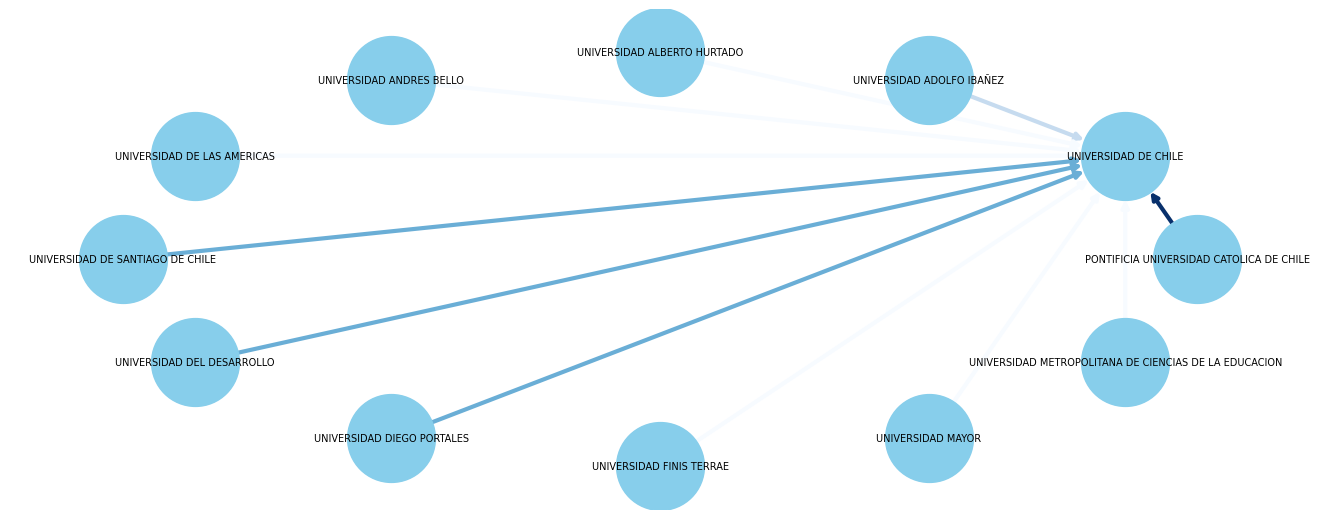

In [7]:
G = nx.from_pandas_edgelist(df_cambio, 'from', 'to', create_using=nx.DiGraph())

plt.figure(figsize=(13, 5))
nx.draw_circular(G, with_labels=True,
        node_color='skyblue',
        node_size=4000,
        edge_color=df_cambio['value'],
        width=3,
        font_size=7,
        edge_cmap=plt.cm.Blues)


- Hubo un cambio hacia la Universidad de Chile, desde 11 Universidades distintas.
-  El mayor número de estudiantes proviene de la Pontificia Universidad Católica de Chile (azul más oscuro).
-  Seguido por las universidades: de Santiago, del Desarrollo y Diego Portales, las tres con el mismo número de estudiantes.
-  A continuación se encuentra la Universidad Adolfo Ibáñez. Luego siguen las cico restantes, todas con la misma cantidad de cambios.

### Parte 2: Visualización de texto



**Análisis de sentimiento:**
Ocuparemos el conjunto de datos visto en el tutorial. Un dataset para la tarea de clasificación de emociones en texto, múltiples etiquetas. Fuente: Dataset Card for SemEval-2018 Task 1: Affect in Tweets. https://huggingface.co/datasets/sem_eval_2018_task_1


*Advertencia: Puede tener contenido sensible u ofensivo.*



**Pregunta 3:** Seleccione dos emociones del conjunto de datos y visualice en un gráfico de barras el top de tri-gramas más frecuentes. Un gráfico de barras para cada emoción. En ambos casos, ordene las barras descendentemente. Comente sus principales observaciones.

*Nota: Debe preprocesar el texto, incluyendo la eliminación de stopwords.*

In [8]:
#!pip3 install datasets
from datasets import list_datasets, load_dataset
data = load_dataset('sem_eval_2018_task_1', 'subtask5.english' , split='test')
data = data.to_pandas()
data.head()

/Users/dani/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,ID,Tweet,anger,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,trust
0,2018-En-01559,@Adnan__786__ @AsYouNotWish Dont worry Indian ...,True,True,False,False,False,False,True,False,False,False,True
1,2018-En-03739,"Academy of Sciences, eschews the normally sobe...",False,False,True,False,False,False,False,False,False,False,False
2,2018-En-00385,I blew that opportunity -__- #mad,True,False,True,False,False,False,False,False,True,False,False
3,2018-En-03001,This time in 2 weeks I will be 30... 😥,False,False,False,False,True,False,False,False,True,False,False
4,2018-En-01988,#Deppression is real. Partners w/ #depressed p...,False,False,False,True,False,False,False,False,True,False,False


In [9]:
#!pip3 install nltk
import re
import string
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
es_stopwords = stopwords.words('english')


def remove_url(text):
    text = re.sub(r"(?:\@|https?\://)\S+", "", text)
    return text

def lower(text):
    return text.lower()

def remove_numbers(text):
    text = re.sub(r"[0-9]", " ", text)
    return " ".join(text.split())

def remove_unprintable_(text):
    printable = set(string.printable)
    text = "".join(filter(lambda x: x in printable, text))
    return text

def remove_punctuation(text):
    pattern = re.compile(r"[^\w]")
    t = pattern.sub(r" ", text)
    return re.sub(" +", " ", t)

def remove_stopwords(text, es_stopwords):
    return " ".join(
        [word for word in str(text).split() if word not in es_stopwords])

def preprocesar(text):
    text = remove_url(text)
    text = lower(text)
    text = remove_numbers(text)
    text = remove_unprintable_(text)
    text = remove_punctuation(text)
    text=remove_stopwords(text,es_stopwords)
    text = text.strip()
    return text

[nltk_data] Downloading package stopwords to /Users/dani/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


/var/folders/9q/796n34zd71xfvwlkqb86ybcw0000gn/T/ipykernel_4504/1482895499.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joy["Tweet_preprocesado"] = joy["Tweet"].apply(preprocesar)


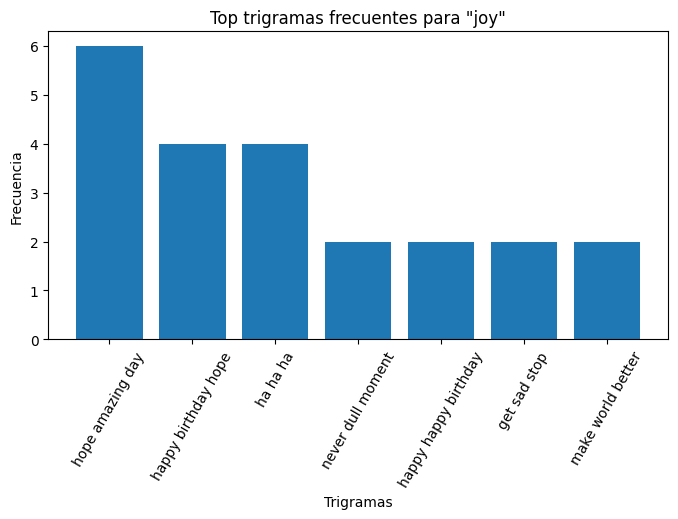

In [10]:
joy=data.loc[data["joy"]==True]
joy["Tweet_preprocesado"] = joy["Tweet"].apply(preprocesar)
vect = CountVectorizer(ngram_range=(3, 3)).fit(joy["Tweet_preprocesado"])
vectors = vect.transform(joy["Tweet_preprocesado"])
df_ngrams = pd.DataFrame(vectors.toarray(), columns=vect.get_feature_names_out())
top_ngrams = df_ngrams.sum().sort_values(ascending=False).head(7)

plt.figure(figsize=(8, 4))
plt.bar(top_ngrams.index, top_ngrams.values)
plt.xlabel('Trigramas')
plt.ylabel('Frecuencia')
plt.title('Top trigramas frecuentes para "joy"')
plt.xticks(rotation=60);

/var/folders/9q/796n34zd71xfvwlkqb86ybcw0000gn/T/ipykernel_4504/2715663858.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sadness["Tweet_preprocesado"] = sadness["Tweet"].apply(preprocesar)


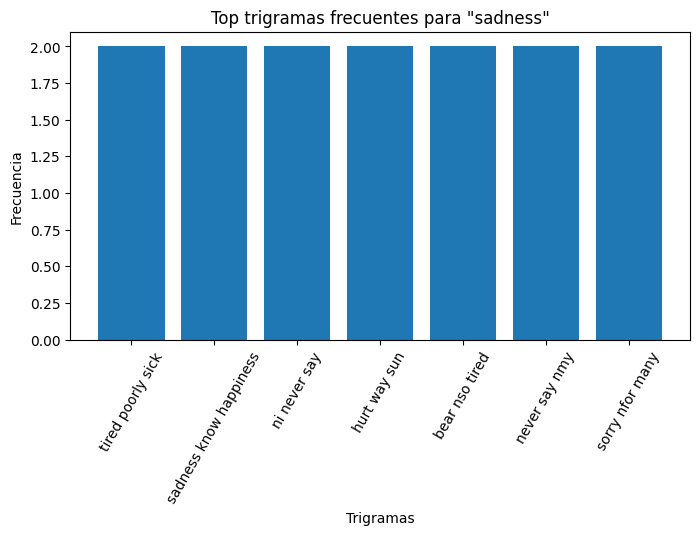

In [11]:
sadness=data.loc[data["sadness"]==True]
sadness["Tweet_preprocesado"] = sadness["Tweet"].apply(preprocesar)
vect = CountVectorizer(ngram_range=(3, 3)).fit(sadness["Tweet_preprocesado"])
vectors = vect.transform(sadness["Tweet_preprocesado"])
df_ngrams = pd.DataFrame(vectors.toarray(), columns=vect.get_feature_names_out())
top_ngrams = df_ngrams.sum().sort_values(ascending=False).head(7)

plt.figure(figsize=(8, 4))
plt.bar(top_ngrams.index, top_ngrams.values)
plt.xlabel('Trigramas')
plt.ylabel('Frecuencia')
plt.title('Top trigramas frecuentes para "sadness"')
plt.xticks(rotation=60);

- Se observa que para el sentimiento "joy" el trigrama más repetido es "hope amazing day".
- Las palabras que más se aparecen son positivas: happy, amazing, hope, awesome. Mientras que para "sadness" se observan palabras negativas: tired, sorry, hurt, sick.
- Para el sentimiento "sadness" no existe un trigrama que destaque por sobre el resto, ya que todos los obtenidos tienen la misma frecuencia igual a 2.

**Pregunta 4:** Visualice una nube de palabras para las emociones seleccionadas en la pregunta anterior. Una nube de palabras para cada emoción. Comente sus principales observaciones.

*Nota: Debe preprocesar el texto, incluyendo la eliminación de stopwords.*

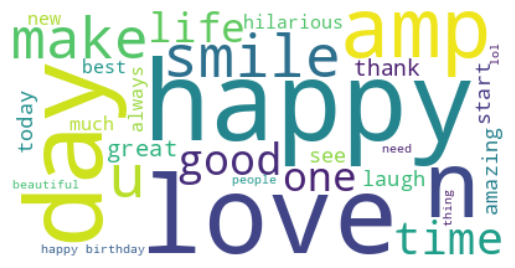

In [12]:
#!pip3 install  wordcloud
from wordcloud import WordCloud

text = " ".join(joy['Tweet_preprocesado'])

wc = WordCloud(background_color="white",max_words=30)
wc.generate(text)

plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

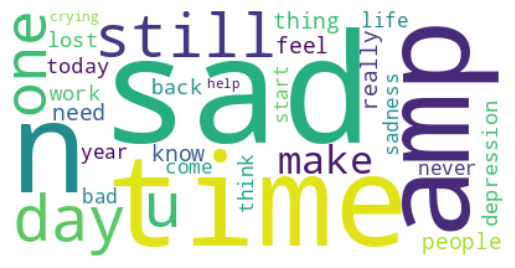

In [13]:
text = " ".join(sadness['Tweet_preprocesado'])

wc = WordCloud(background_color="white",max_words=30)
wc.generate(text)

plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

- En ambos gráficos se observan las palabras time, amp, day, make.
- Las palabras que más destacan en "joy" son happy, love, smile, por nombrar algunas.
- También se pueden observar algunas menos frecuentes (más pequeñas) como laugh, amazing, good. Todas estas asociadas a sentimientos de felicidad.
- Las palabras que más destacan en "sadness" son sad, still. También se pueden observar algunas menos frecuentes (más pequeñas) como crying, sadness, bad, depression. Todas estas asociadas a sentimientos de tristeza.